# Conditions of test task

---



Запустить, не как докер а как процесс, в IDE ~~поставить брейкпоинт~~ и сделать variable evaluation.

**?** Так же вам надо для тестового использовать Cvat: https://www.cvat.ai/

**?** Ожидаемый результат:
Остановить брейкпоинт на создании таска и прислать скриншот с code evaluation объекта request

Context:
These are deviations of floor vs ceiling corners of one of our models with ground truth labels
for the room name and number of corners in that room with predictions. Please create
meaningful statistics of how well the model performed.

Create project in ide, pycharm or vscode

Create requirements.txt and virtual env

~~Create class for drawing plots~~

~~Create function “draw_plots”~~

~~→ reads json file passed as parameter as a pandas dataframe~~

~~→ draws plot for comparing different columns~~

~~→ saves plots in a folder called “plots”~~

~~→ returns paths to all plots~~

Publish the project on github

# Creating a class, function, brakepoint, evaluation

---



In [21]:
class docusketch_test:

  def read_json(self, path):
    import pandas as pd
    try:
      df = pd.read_json(path)
    except ValueError:
      print('Are you sure that your path is to json-file?')
    return df

  def show_plots(self):
    try:
      df = self.read_json(path)
      df.hist(layout=(-1, 6), figsize=(16,6))
    except ValueError:
      print('Are you sure that you dataframe has non-object columns?')
    except NameError:
      print('Are you sure that you have not skiped read_json?')

  def save_plots(self):
    import matplotlib.pyplot as plt
    import os
    if not os.path.exists('results'):
      os.makedirs('results')
    try:
      df = self.read_json(path)
      for column in df.select_dtypes(exclude='object').columns:
        plt.title(column)
        df[column].hist(figsize=(4,4))
        plt.savefig(f'results/{column}.png')
        plt.clf()
      print('Saving completed!')
    except NameError:
      print('Are you sure that you have not skiped previous steps?')

  def return_paths(self):
    import os
    try:
      for file in os.listdir('results'):
        file_path = os.path.join('results', file)
        print(file_path)
    except NameError:
        print('Are you sure that you have not skiped previous steps?')

  def draw_plots(self, path):
      import pandas as pd
      import matplotlib.pyplot as plt
      import os
      df = self.read_json(path)
      if not os.path.exists('results'):
        os.makedirs('results')
      for column in df.select_dtypes(exclude='object').columns:
        plt.title(column)
        df[column].hist(figsize=(4,4))
        plt.savefig(f'results/{column}.png')
        plt.clf()
      df.hist(layout=(-1, 6), figsize=(16,6))
      for file in os.listdir('results'):
        file_path = os.path.join('results', file)
        print(file_path)
      breakpoint()

results/min.png
results/ceiling_min.png
results/floor_max.png
results/gt_corners.png
results/floor_mean.png
results/ceiling_mean.png
results/floor_min.png
results/mean.png
results/rb_corners.png
results/ceiling_max.png
results/max.png
--Return--
None
> <ipython-input-21-c0f090733096>(61)draw_plots()
     57       df.hist(layout=(-1, 6), figsize=(16,6))
     58       for file in os.listdir('results'):
     59         file_path = os.path.join('results', file)
     60         print(file_path)
---> 61       breakpoint()

ipdb> c


<Figure size 400x400 with 0 Axes>

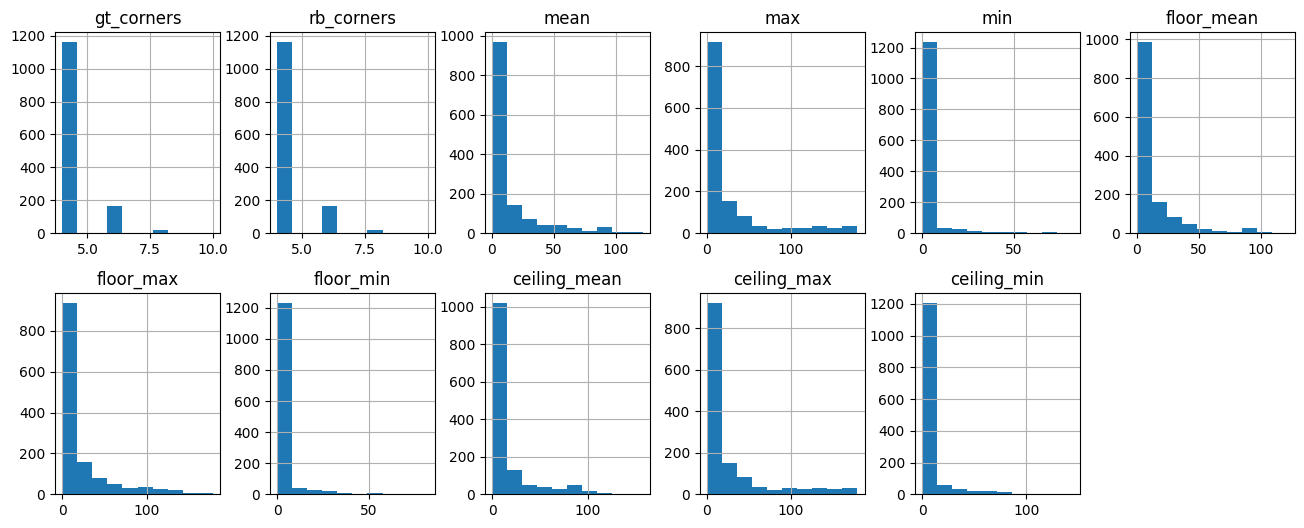

In [28]:
string = """docusketch_test().draw_plots('https://ai-process-sandy.s3.eu-west-1.amazonaws.com/purge/deviation.json')"""
eval(string)

# Evaluating the model, statistics

---



In [29]:
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
dfr = pd.read_json('https://ai-process-sandy.s3.eu-west-1.amazonaws.com/purge/deviation.json')

Gt_corners = ground truth number of corners in the room

Rb_corners = number of corners found by the model

Mean max min and all others are deviation values in degrees.

In [31]:
dfr.head()

,name,gt_corners,rb_corners,mean,max,min,floor_mean,floor_max,floor_min,ceiling_mean,ceiling_max,ceiling_min
0,Schlafzimmer,4,4,3.956313,8.562939,0.274574,3.987864,8.562939,0.274574,3.924762,8.501885,0.331494
1,Küche,4,4,23.019122,52.605437,0.724299,1.253103,1.897612,0.724299,44.785141,52.605437,36.880814
2,Bathroom,4,4,1.013833,1.950322,0.301673,0.659138,1.318714,0.301673,1.368528,1.950322,0.878106
3,Lounge/Diner,8,8,3.832620,18.236935,0.173307,3.600083,15.041431,0.173307,4.065157,18.236935,0.253457
4,Essbereich,4,4,8.017758,15.642853,0.762948,7.819446,15.399635,0.762948,8.216069,15.642853,0.909029


In [33]:
dfr.describe()

,gt_corners,rb_corners,mean,max,min,floor_mean,floor_max,floor_min,ceiling_mean,ceiling_max,ceiling_min
count,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000
mean,4.307350,4.307350,12.895320,25.448011,2.920388,11.022443,20.405499,3.146246,14.768198,24.848020,5.521437
std,0.814412,0.814412,21.839948,42.758159,9.258972,19.136320,33.189081,9.559611,26.047057,42.345579,14.460565
min,4.000000,4.000000,0.192973,0.323886,0.007456,0.134686,0.178059,0.007456,0.123169,0.220846,0.009268
25%,4.000000,4.000000,0.658488,1.243804,0.147432,0.514150,0.888043,0.164668,0.742915,1.180960,0.306071
50%,4.000000,4.000000,2.123456,4.703514,0.279876,1.932503,4.008014,0.304374,2.159995,3.777277,0.600597
75%,4.000000,4.000000,14.810982,28.312051,0.674444,13.430288,24.986504,0.801416,15.150233,27.551533,1.840563
max,10.000000,10.000000,121.301055,179.165483,81.764483,121.244083,177.961811,81.791505,157.387474,179.165483,144.472533


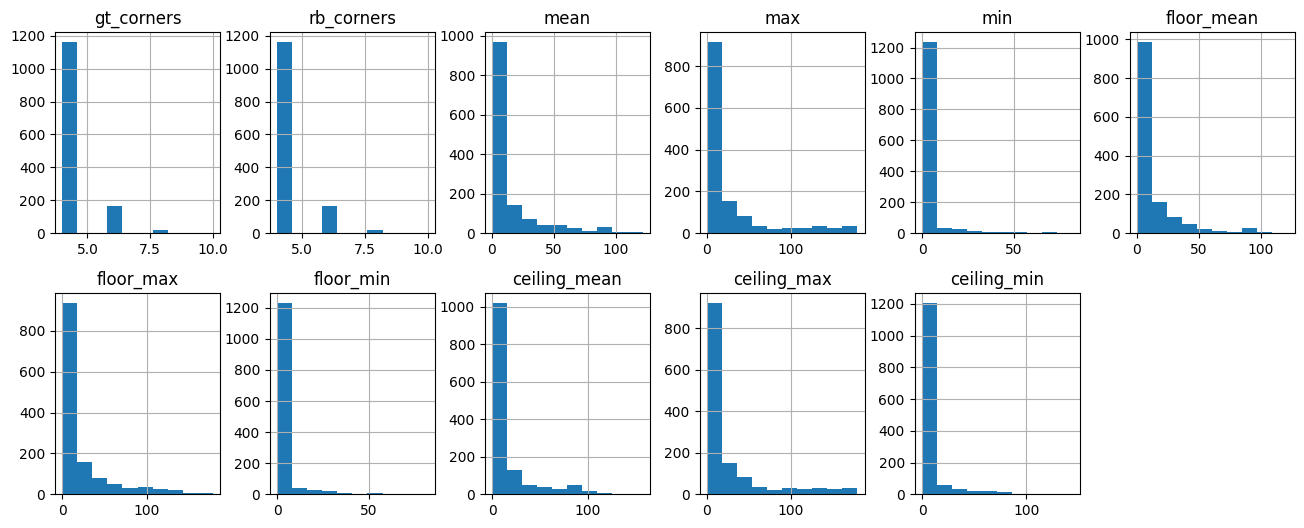

In [34]:
dfr.hist(layout=(-1, 6), figsize=(16,6))
plt.savefig('aa.pdf')

In [35]:
dfr.shape

(1347, 12)

In [36]:
dfr['name'].value_counts()[:5]

Master Bedroom    42
Dining room       36
Bathroom          36
Hallway           31
Bedroom 2         31
Name: name, dtype: int64

In [37]:
dfr['gt_corners'].value_counts()

4     1163
6      162
8       21
10       1
Name: gt_corners, dtype: int64

In [38]:
dfr[dfr.gt_corners==10]

,name,gt_corners,rb_corners,mean,max,min,floor_mean,floor_max,floor_min,ceiling_mean,ceiling_max,ceiling_min
739,Master Bathroom,10,10,13.202775,53.145464,0.195567,13.67592,53.145464,0.262791,12.72963,49.7854,0.195567


In [39]:
dfr.name.nunique()

588

In [40]:
dfr.isna().sum()

name            0
gt_corners      0
rb_corners      0
mean            0
max             0
min             0
floor_mean      0
floor_max       0
floor_min       0
ceiling_mean    0
ceiling_max     0
ceiling_min     0
dtype: int64

In [41]:
dfr.duplicated().sum()

0

In [42]:
dfr[dfr.gt_corners != dfr.rb_corners]

,name,gt_corners,rb_corners,mean,max,min,floor_mean,floor_max,floor_min,ceiling_mean,ceiling_max,ceiling_min


We see that the model predictions has the right amount of corners for all of existing rooms.

Top 5 type of rooms is Master Bedroom, Dining room, Bathroom, Hallway, Bedroom.

Mostly of rooms (1163) have 4 corners, 162 rooms have 6 corners, 21 rooms have 8 corners and only 1 room has 10 corner - Master Bathroom.